# Keras CNN 
Adapted from https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

In [103]:
import sys
import os
import numpy as np
import pandas as pd
import cPickle as pickle
import sklearn
from sklearn.model_selection import train_test_split
# from PIL import Image
# import png
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from skimage.color import convert_colorspace,rgb2ycbcr

In [118]:
# Parameter setting
home = '/Users/chih-hsulin/'
home = '/Users/chlin'
batch_size = 500
num_classes = 10
epochs = 20
data_augmentation = True

In [7]:
# Load subset of training data
pFN = '../data/trainSubset.pkl'
pFile = open(pFN, 'rb')
trainX,trainY = pickle.load(pFile)
trainY = trainY - 1
trainY = keras.utils.to_categorical(trainY, num_classes)

EOFError: 

In [4]:
pFN = home+'/data/COMP540Project2017/train.pkl'
pFile = open(pFN, 'rb')
trainX,trainY = pickle.load(pFile)
trainY = trainY - 1
trainY = keras.utils.to_categorical(trainY, num_classes)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


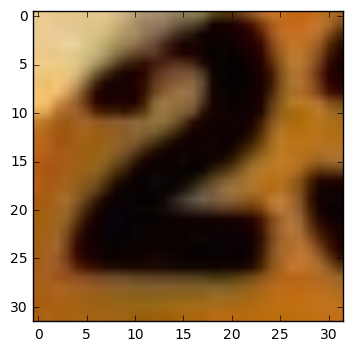

In [126]:
print(trainY[2])
plt.imshow(trainX[2])

(32, 32)


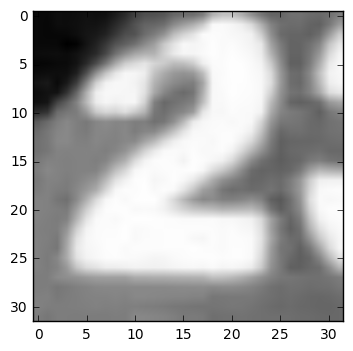

In [132]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# img=convert_colorspace(trainX[3],'RGB','HSV')
img = rgb2gray(trainX[2])
plt.imshow(img,cmap='gray')
print(img.shape)

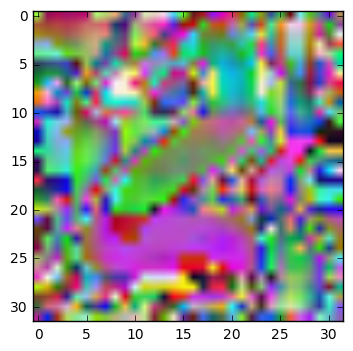

In [61]:
def StandardScaler3d(img):
    final = []
    for x in img:
        final.append(sklearn.preprocessing.StandardScaler().fit_transform(x))
    return(np.array(final))

img = StandardScaler3d(img)
plt.imshow(img)

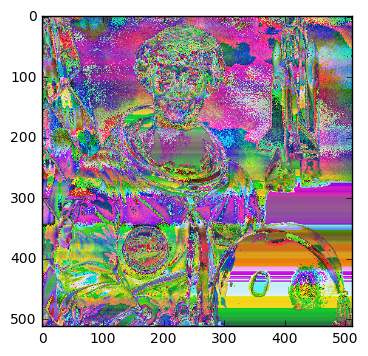

In [70]:
from skimage import data
img = data.astronaut()
plt.imshow(img)
plt.imshow(StandardScaler3d(rgb2ycbcr(img)))

In [41]:
# Load test data
pFN = home+'/data/COMP540Project2017/test.pkl'
pFile = open(pFN, 'rb')
testX = pickle.load(pFile)
testX.shape

(26032, 32, 32, 3)

In [42]:
print('x_train shape:', trainX.shape)
print(len(trainX), 'train samples')
print(len(testX), 'test samples')
test_train_ratio = float(len(testX))/(len(trainX)+len(testX))
test_train_ratio

x_train shape: (73257, 32, 32, 3)
73257 train samples
26032 test samples


0.2621841291583156

In [43]:
x_train, x_val, y_train, y_val = train_test_split(trainX, trainY, test_size=test_train_ratio, random_state=0)
print(x_train.shape)
print(x_val.shape)

(54050, 32, 32, 3)
(19207, 32, 32, 3)


# Build model

In [71]:
# CNN from Keras example
modelName = 'CNN_v2'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [104]:
# CNN from Keras example
modelName = 'CNN_v3'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [119]:
# CNN from Keras example
modelName = 'CNN_v4'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# CNNv1
modelName = 'CNN_v1'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [120]:
# Let's train the model using RMSprop
Adamax = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
              optimizer=Adam,
              metrics=['accuracy'])

In [73]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
testX = testX.astype('float32')
x_train /= 255
x_val /= 255
x_test = testX/255

In [121]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_val, y_val))

Using real-time data augmentation.
Epoch 1/20
108/108 [==============================] - 248s - loss: 2.0795 - acc: 0.2995 - val_loss: 2.2839 - val_acc: 0.3160
Epoch 2/20
108/108 [==============================] - 243s - loss: 1.1508 - acc: 0.6131 - val_loss: 2.2705 - val_acc: 0.2678
Epoch 3/20
108/108 [==============================] - 241s - loss: 0.8035 - acc: 0.7385 - val_loss: 1.4605 - val_acc: 0.4801
Epoch 4/20
108/108 [==============================] - 254s - loss: 0.6588 - acc: 0.7895 - val_loss: 1.1517 - val_acc: 0.6123
Epoch 5/20
108/108 [==============================] - 264s - loss: 0.5675 - acc: 0.8202 - val_loss: 0.4560 - val_acc: 0.8582
Epoch 6/20
108/108 [==============================] - 264s - loss: 0.5107 - acc: 0.8399 - val_loss: 0.3987 - val_acc: 0.8757
Epoch 7/20
108/108 [==============================] - 264s - loss: 0.4646 - acc: 0.8559 - val_loss: 0.3276 - val_acc: 0.9008
Epoch 8/20
108/108 [==============================] - 263s - loss: 0.4355 - acc: 0.8648 - 

# Save model

In [122]:
date = datetime.now().strftime("%Y%m%d_%H%M")
model.save('../submission/'+date+"_"+modelName+'.h5')

# Make prediction

In [123]:
classes = model.predict(x_test, batch_size=batch_size)
classes2 = [np.argmax(x)+1 for x in classes]

# Output prediction

In [124]:
fout = open('../submission/'+date+"_"+modelName+'.csv','w')
fout.write('ImageId,label\n')
for i,x in enumerate(classes2):
    fout.write("{},{}\n".format(i,x))
fout.close()

9


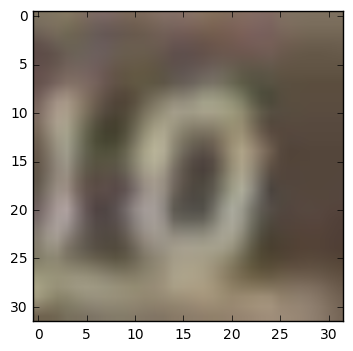

In [125]:
plt.imshow(testX[3])
print(classes2[3])

# Load modal and output prediction

In [69]:
date = '20170406_0002'
modelName = 'CNN_v1'
model = load_model(date+"_"+modelName+'.h5')
fout = open('../submission/'+date+"_"+modelName+'.csv','w')
fout.write('ImageId,label\n')
for i,x in enumerate(classes2):
    fout.write("{},{}\n".format(i,x))
fout.close()

IOError: Unable to open file (Unable to open file: name = '20170406_0002_cnn_v1.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)